# **Project Name**

**Classification - Tata Steel Machine Failure Prediction & Maintenance**

**Project Type** - **Exploratory Data Analysis**

**Contribution** - **Individual**

**Name** - **ARUNABH BHATTACHARYA**




# **Project Summary**



This project focuses on developing a predictive model for machine failures within Tata Steel's manufacturing processes.  The primary objective is to leverage historical machine data to anticipate potential failures, enabling proactive maintenance and minimizing costly downtime.  The project employs exploratory data analysis (EDA) techniques to gain a deep understanding of the dataset, identify patterns, and extract meaningful insights that inform the development of an effective predictive model.

The dataset used in this project encompasses various operational parameters and sensor readings from Tata Steel's machines, along with records of past failures.  The EDA phase begins with data cleaning and preprocessing. This crucial step involves handling missing values, identifying and addressing outliers, and transforming data into a format suitable for machine learning algorithms.  Data visualization is a key component of the EDA, providing visual representations of data distributions, correlations between variables, and patterns in machine behavior.  Histograms, scatter plots, box plots, and time-series plots are utilized to gain a comprehensive overview of the data.

Feature engineering plays a vital role in improving the model's predictive power.  Based on the insights gained from the EDA, new features are created from existing ones. This might involve combining variables, calculating statistical measures, or generating time-based features to better capture the temporal dynamics of machine performance.  For example, creating rolling averages of sensor readings might reveal trends not readily apparent in individual measurements.  The effectiveness of these newly engineered features is assessed through further exploratory analysis.

The goal of the predictive modeling is to create a robust classifier capable of accurately distinguishing between operational states (normal operation vs. impending failure).  Various classification algorithms are explored, and their performance is evaluated using appropriate metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.  The choice of the best model depends on the specific requirements of the project – considering the balance between accuracy, computational cost, and interpretability.  The model's performance is validated rigorously using cross-validation techniques to ensure its generalizability to unseen data.

Furthermore, the project evaluates the potential benefits of implementing the predictive model within Tata Steel's existing maintenance framework. This involves assessing the potential reduction in maintenance costs, downtime, and production losses. A cost-benefit analysis, based on the predicted savings from avoiding unexpected machine failures, helps quantify the potential return on investment (ROI) of deploying the predictive model.  This financial evaluation supports decision-making regarding the model's practical implementation.

Finally, the project concludes with a comprehensive report detailing the methodology employed, the key findings from the EDA, the selected predictive model, its performance, and a recommendation for its implementation within the Tata Steel operation.  The report includes detailed visualizations, statistical analyses, and a clear articulation of the project's outcomes and potential impact on operational efficiency and cost savings.  The overall objective is to provide a data-driven approach to machine maintenance that translates directly to tangible benefits for Tata Steel.


# **Github Link**

# **Problem Statement**

The project aims to predict machine failures in Tata Steel's manufacturing processes using historical machine data.  This predictive model will enable proactive maintenance, minimizing downtime and associated costs.  The challenge lies in analyzing a dataset of operational parameters and sensor readings, identifying patterns indicative of impending failures, and developing a robust classification model to distinguish between normal operation and imminent failures.

#### **Business Objective**

To develop a predictive model for machine failures at Tata Steel, enabling proactive maintenance, minimizing downtime and associated costs, and ultimately improving operational efficiency and cost savings.

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
data = pd.read_csv("train (2).csv")

In [ ]:
data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [ ]:
data.shape

(136429, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [ ]:
data.duplicated()
len(data[data.duplicated()])

0

In [ ]:
###finding the number of missing values in the entire datframe
data.isnull().sum().sum()


0

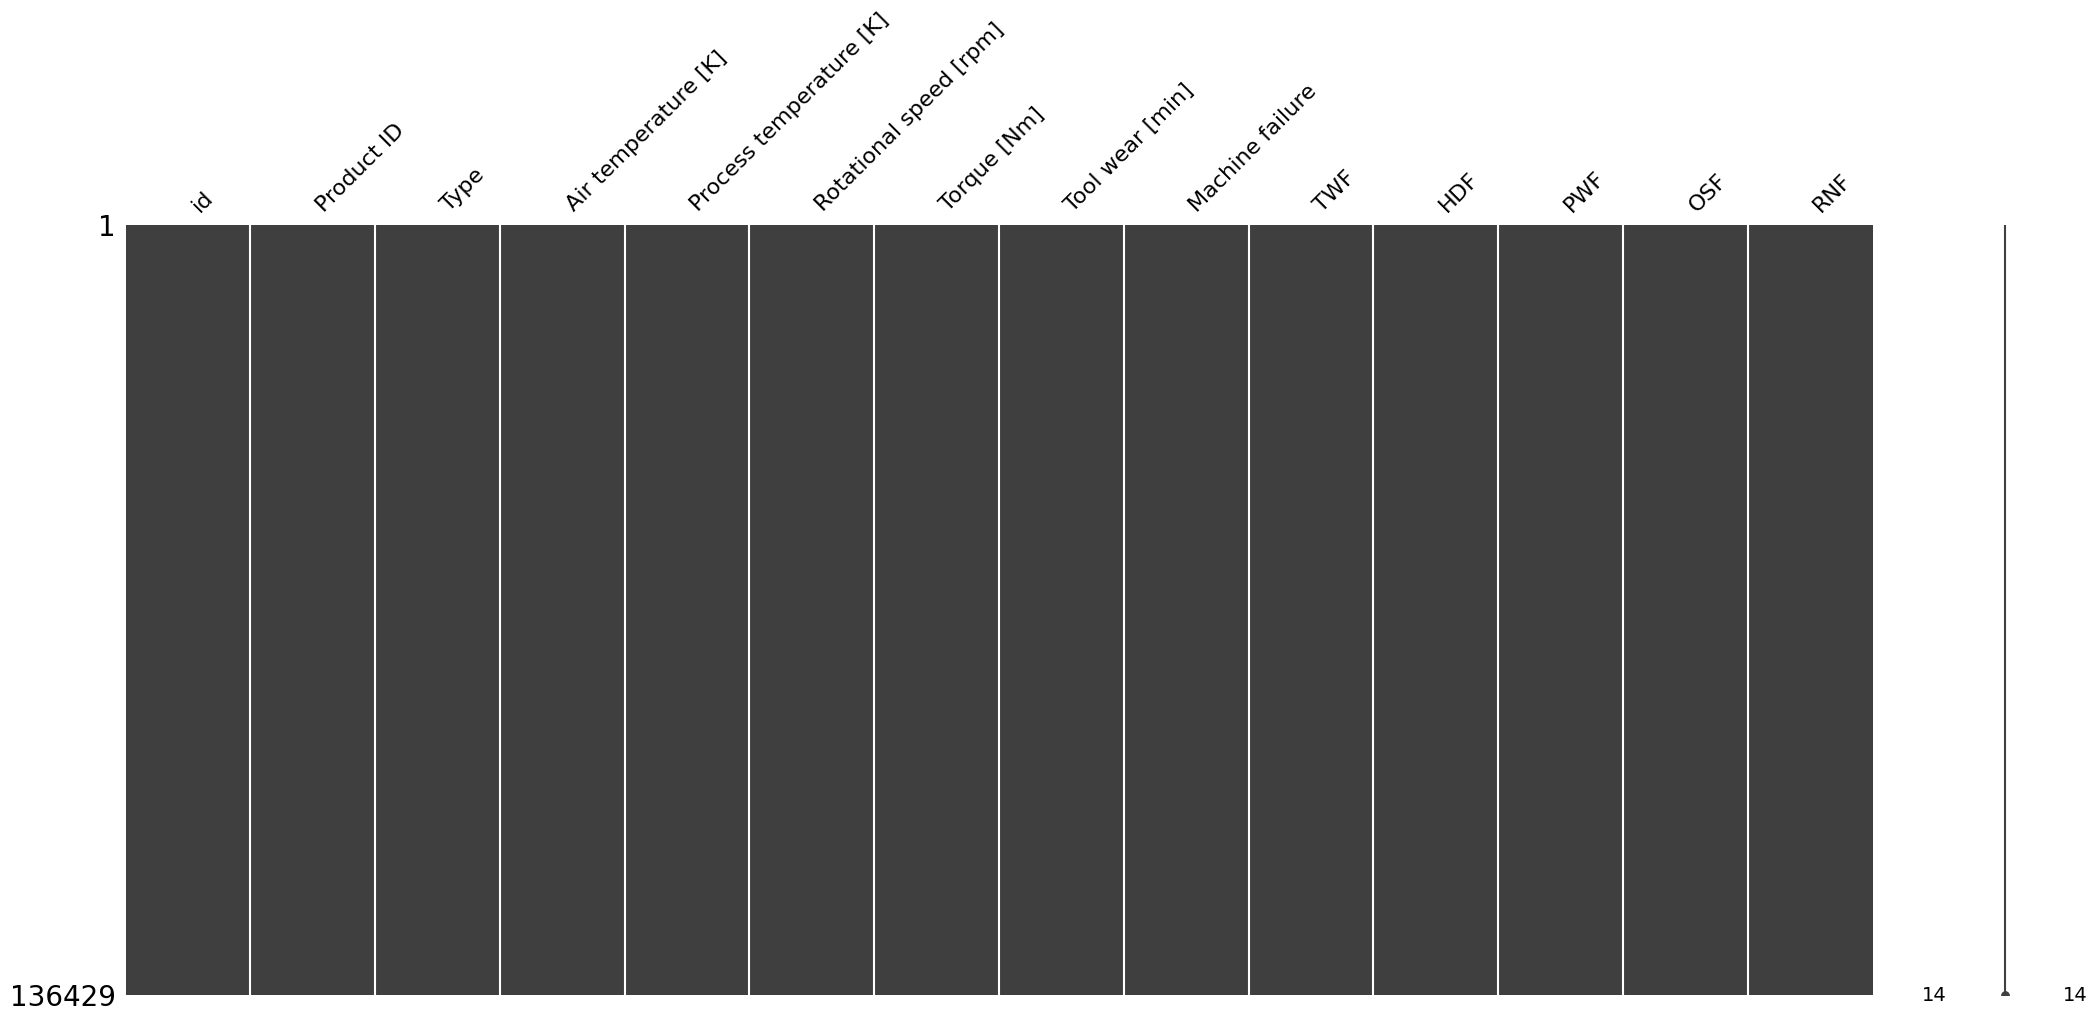

In [ ]:
###visualizing missing values through a matrix
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(data)
plt.show()

In [ ]:
#####There are 136429 rows and 14 columns
#####id, Product ID, Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure, TWF, HDF, PWF, OSF, RNF
#####there are no duplicates and no missing values

In [ ]:
data.columns.values.tolist()

['id',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [ ]:
data.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


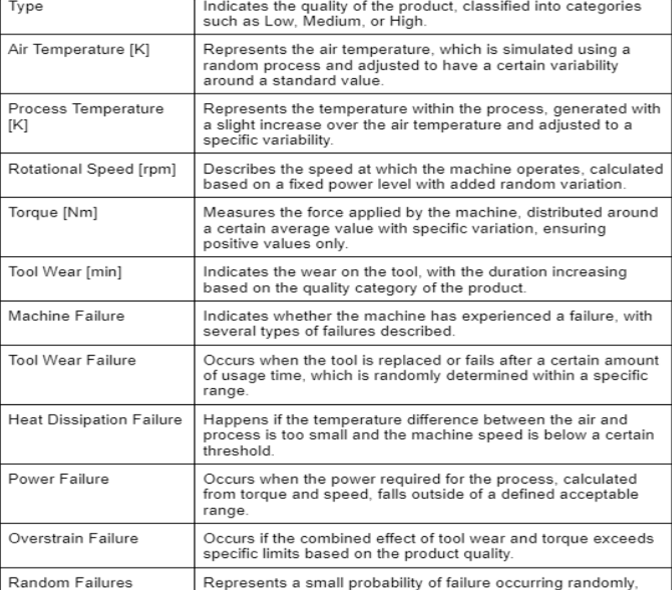

In [ ]:
####variables description
from IPython.display import Image
Image("dict.png")

In [ ]:
####checking unique variables for each column
unique_values = data.nunique()
unique_values

,0
id,136429
Product ID,9976
Type,3
Air temperature [K],95
Process temperature [K],81
Rotational speed [rpm],952
Torque [Nm],611
Tool wear [min],246
Machine failure,2
TWF,2


In [ ]:
data['Type'] = data['Type'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   id                       136429 non-null  int64   
 1   Product ID               136429 non-null  object  
 2   Type                     136429 non-null  category
 3   Air temperature [K]      136429 non-null  float64 
 4   Process temperature [K]  136429 non-null  float64 
 5   Rotational speed [rpm]   136429 non-null  int64   
 6   Torque [Nm]              136429 non-null  float64 
 7   Tool wear [min]          136429 non-null  int64   
 8   Machine failure          136429 non-null  int64   
 9   TWF                      136429 non-null  int64   
 10  HDF                      136429 non-null  int64   
 11  PWF                      136429 non-null  int64   
 12  OSF                      136429 non-null  int64   
 13  RNF                      136429 non-null  in

In [ ]:
cleaned = data.drop(columns=['id'])
cleaned.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [ ]:
cleaned.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cleaned.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


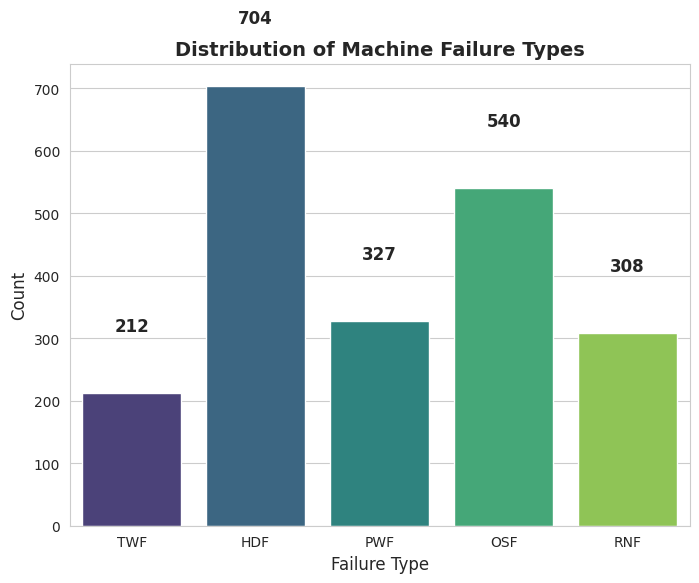

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Failure type counts
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_counts = cleaned[failure_types].sum()

# Create figure and plot
plt.figure(figsize=(8,6))
bars = sns.barplot(x=failure_counts.index, y=failure_counts.values, palette="viridis")

# Add value labels on bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,  # Adjust position
             f"{int(bar.get_height())}", ha='center', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Distribution of Machine Failure Types', fontsize=14, fontweight='bold')
plt.xlabel('Failure Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show plot
plt.show()


In [ ]:
###Why this Chart?
###A bar chart helps visualize the distribution of different failure types
###(TWF, HDF, PWF, OSF, RNF). This allows us to understand which failure type
###occurs the most, guiding maintenance strategies.

In [ ]:
###Insights from the Chart:
###Highest Failure Type (HDF - 704 cases):
###HDF (likely "High-Damage Failure") is the most frequent failure type, occurring 704 times. This suggests a critical issue in the machine operation that requires immediate attention.

###Moderate Failures (OSF - 540 cases, PWF - 327 cases, RNF - 308 cases):
###OSF (possibly "Operational System Failure") is the second-highest type with 540 cases, indicating that operational issues significantly contribute to machine downtime.
###PWF (327 cases) and RNF (308 cases) are relatively lower but still substantial. These could be "Power-Related Failure" and "Routine Non-Critical Failure," respectively, needing targeted maintenance strategies.

###Lowest Failure Type (TWF - 212 cases):
###TWF (potentially "Temporary Warning Failure") occurs the least but is still non-negligible. If these failures escalate, they may lead to more severe issues like HDF.

In [ ]:
###Business Impact:
####Increased Downtime & Lost Productivity: Frequent failures, especially HDF and OSF, could result in prolonged machine downtime, reducing overall operational efficiency and production output.

###Higher Maintenance Costs: A high occurrence of HDF suggests that repair costs are likely significant. Businesses may need to invest in preventive maintenance strategies to reduce long-term expenses.

###Risk to Quality & Safety: Machines experiencing frequent failures can lead to inconsistent product quality, safety hazards for workers, and potential compliance issues.

###Need for Predictive Maintenance: Implementing predictive analytics and condition-based monitoring can help detect failure patterns early, reducing unexpected breakdowns and improving reliability.

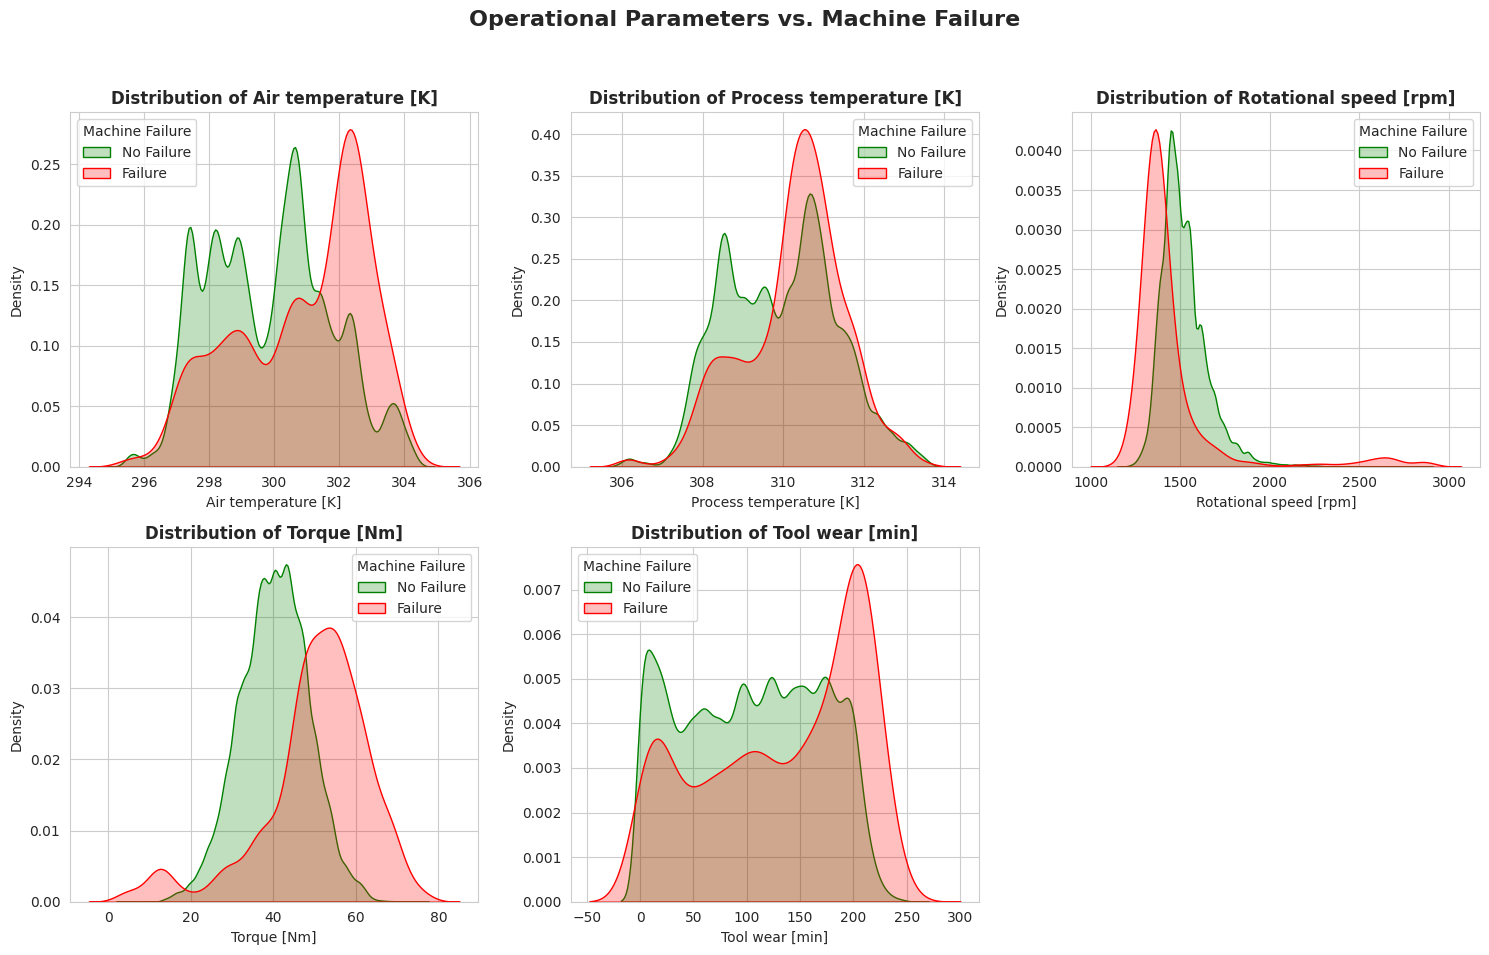

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the variables to plot
variables = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]
colors = ["blue", "orange", "green", "red", "purple"]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten to easily iterate

for i, var in enumerate(variables):
    sns.kdeplot(cleaned[cleaned["Machine failure"] == 0][var], label="No Failure", shade=True, color="green", ax=axes[i])
    sns.kdeplot(cleaned[cleaned["Machine failure"] == 1][var], label="Failure", shade=True, color="red", ax=axes[i])

    axes[i].set_title(f"Distribution of {var}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel("Density", fontsize=10)
    axes[i].legend(title="Machine Failure", fontsize=10)
    axes[i].grid(True)

# Remove the last empty subplot (since we have 5 variables but 6 subplots)
fig.delaxes(axes[-1])

plt.suptitle("Operational Parameters vs. Machine Failure", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for title
plt.show()

In [ ]:
###Why this Chart?
###A KDE Plot shows the probability distribution of torque for machines that failed vs. those that did not.
###It makes it easier to spot shifts in distribution (e.g., if failed machines have higher torque values).
###Unlike a box plot, it provides a smooth, continuous view of the data distribution.

In [ ]:
###Insight:
####Insights from the Chart
####The charts show the distribution of various operational parameters (air temperature, process temperature, rotational speed, torque, and tool wear) in relation to machine failures. The key observations are:

####Air Temperature & Process Temperature:
###Machine failures (red) tend to occur at higher air temperatures (~302-304K) and higher process temperatures (~310-312K).
###This suggests that excessive heat plays a role in machine breakdowns, possibly due to overheating or thermal stress.

###Rotational Speed:
###Machine failures are more frequent at lower rotational speeds (~1000-1500 rpm).
###This could indicate that low-speed operations are more prone to failure, possibly due to insufficient power or mechanical inefficiencies.

###Torque:
###Machine failures occur when torque values are relatively high (~40-80 Nm).
###High torque might stress mechanical components, leading to faster wear and failure.

###Tool Wear:
###Failures are more common when tool wear exceeds ~200 minutes.
###This suggests that excessive tool usage without timely replacement significantly increases failure rates.

In [ ]:
###Business Impact:
####Increased Downtime & Lost Productivity
####High machine failure rates due to overheating, excessive tool wear, or improper operational parameters can reduce overall equipment efficiency, leading to production delays.

####Higher Maintenance & Replacement Costs
####Frequent failures at high temperatures and excessive tool wear suggest that businesses may incur high maintenance and equipment replacement costs. Implementing a preventive maintenance schedule can help mitigate this.

###Quality & Safety Risks
###Operating machines at suboptimal conditions (low speed, high torque, excessive wear) can compromise product quality and pose safety hazards to workers.

####Need for Predictive Maintenance & Process Optimization
####Businesses should leverage predictive analytics to monitor these operational parameters in real-time and preemptively address potential failures.
####Adjusting operating conditions (e.g., optimal speed, controlled temperature, timely tool replacements) can significantly reduce machine failures and improve efficiency.

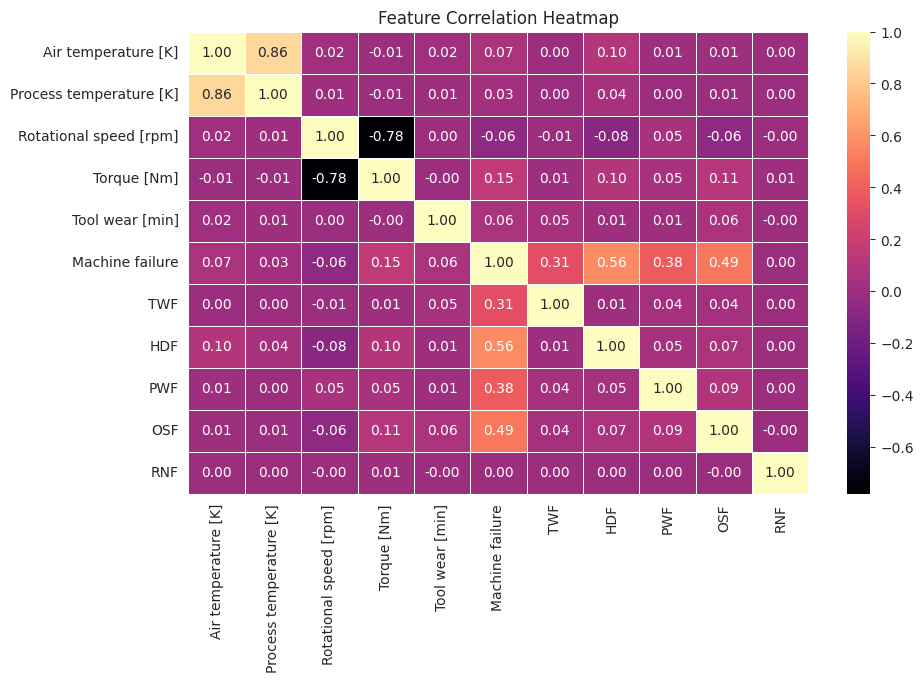

In [ ]:
# Select only numerical features for correlation calculation
numerical_features = cleaned.select_dtypes(include=np.number).columns
numerical_data = cleaned[numerical_features]

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap="magma", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
###Why this Chart?
###A heatmap helps identify relationships between features and machine failure, guiding feature selection for predictive models.

In [ ]:
###Key Insights from the Correlation Heatmap:

###HDF (0.56), OSF (0.49), and PWF (0.38) strongly contribute to machine failures.
###Focus on these failure types for predictive maintenance.

####Torque has a slight impact on failures (0.15), but tool wear has minimal effect (0.06).
####Set torque thresholds instead of relying solely on tool wear.

###Air & Process Temperature are highly correlated (0.86) but don’t strongly impact failures.
####Prioritize other parameters like torque and failure types.

####Rotational Speed & Torque are strongly negatively correlated (-0.78).
####Optimize speed-torque balance to prevent machine stress.

In [ ]:
###Business Impact:
###Proactive maintenance, reducing downtime & costs
###Optimized machine settings, preventing failures.
####Better resource allocation, focusing on key failure factors.

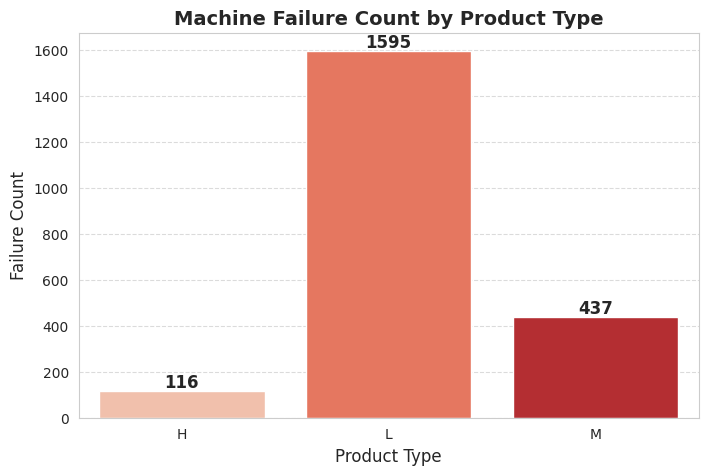

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only failure cases
failures_only = cleaned[cleaned["Machine failure"] == 1]

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=failures_only, x="Type", palette="Reds")

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Machine Failure Count by Product Type", fontsize=14, fontweight="bold")
plt.xlabel("Product Type", fontsize=12)
plt.ylabel("Failure Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
####Why I have chosen this chart?
'''
A bar chart is an effective choice because it clearly displays the machine
failure count for different product types (H, L, M). It allows for easy
comparison, highlighting the significant difference in failure rates among
product categories. The labels on top of each bar further enhance readability.
'''

In [ ]:
####What Insight I am getting?
'''
1. Product Type "L" (Low) has the highest failure count (1,595), significantly more
than "M" (437) and "H" (116).
2. Product Type "H" has the lowest failure count, indicating that machines
processing "H" products may operate under more stable conditions or better quality controls.
3. The high failure rate for Product Type "L" suggests operational inefficiencies,
material inconsistencies, or increased mechanical stress.
'''

In [ ]:
####what business imapct I am getting fro this insight

###Production Downtime & Costs: The high failure count for Product Type L can lead to increased downtime, delays, and financial losses.

###Quality & Customer Satisfaction Risks: If failures disrupt production, it could lead to supply chain issues and missed delivery deadlines.

###Optimization Required: Businesses should investigate whether Product Type L has quality issues, machine compatibility challenges, or requires better preventive maintenance.

###Resource Allocation: More maintenance resources should be allocated to machines handling Product Type L to reduce breakdowns and improve efficiency.

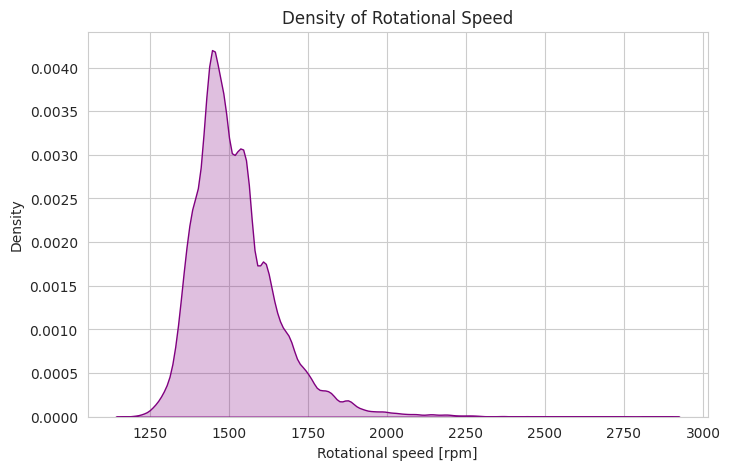

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(cleaned['Rotational speed [rpm]'], shade=True, color='purple')
plt.title('Density of Rotational Speed')
plt.xlabel('Rotational speed [rpm]')
plt.show()

In [ ]:
###why this chart
'''
A density plot is ideal for analyzing the distribution of rotational speed
as it provides a smooth visualization of data concentration across different
speed ranges. It helps identify peak operating ranges, outliers, and patterns
that might be missed in histograms or summary statistics.
'''

In [ ]:
####what insight I got ?

###Most machines operate between 1250-1750 rpm, with a peak around 1500 rpm.

####The distribution is right-skewed, meaning fewer machines operate at higher speeds beyond 1750 rpm.

#####There are very few instances where rotational speed exceeds 2250 rpm, suggesting that extreme speeds are rare and could be outliers or cases requiring special attention.

In [ ]:
###The business impact from this insight

#### Predictive Maintenance Needs: If failures occur frequently at higher speeds, businesses should monitor and set thresholds for predictive maintenance alerts.

####Performance Optimization: Machines might be designed to operate efficiently at 1500 rpm, so running them at much higher speeds could increase wear and tear.

####Cost Savings: Avoiding operations in extreme rpm ranges can extend machine life, reduce energy consumption, and lower maintenance costs.

#####Quality Control: If higher rotational speeds correlate with product defects or machine breakdowns, adjusting speed settings may enhance product consistency and reliability.

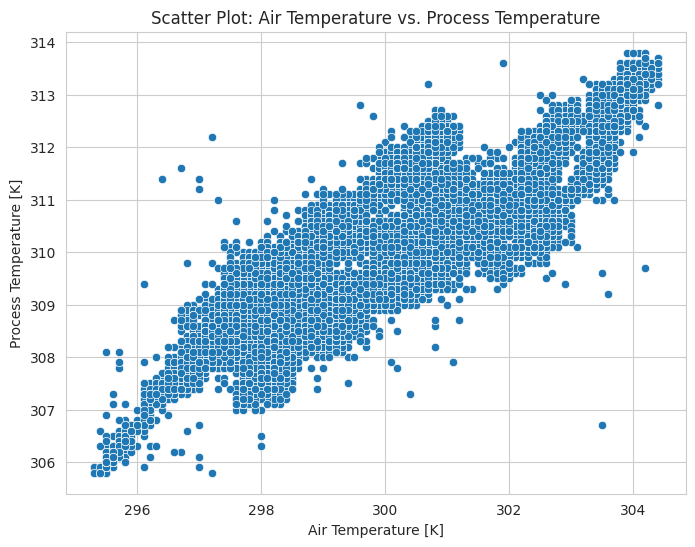

In [ ]:
# prompt: scatter plot between air temp and process temp

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cleaned' DataFrame from your previous code
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Air temperature [K]", y="Process temperature [K]", data=cleaned)
plt.title("Scatter Plot: Air Temperature vs. Process Temperature")
plt.xlabel("Air Temperature [K]")
plt.ylabel("Process Temperature [K]")
plt.show()

In [ ]:
####why this chart

####A scatter plot is the best choice to analyze the relationship between air temperature and process temperature, as it effectively visualizes correlation, patterns, and potential outliers.

In [ ]:
####the insight I got from this chart

####Strong Positive Corrfrom elation: As air temperature increases, process temperature also increases, forming an upward trend.

####Dense Clustering: Most data points fall within a narrow band, suggesting a consistent linear relationship between the two variables.

######Few Outliers: Some points deviate from the main trend, indicating possible anomalies or external influences on process temperature.

In [ ]:
####The business impact from this insight

### Process Stability: Since process temperature is highly dependent on air temperature, environmental control is crucial for maintaining optimal operating conditions.

####Energy Efficiency: Predicting process temperature based on air temperature can help optimize cooling and heating systems, reducing energy costs.

######Predictive Maintenance: If unexpected deviations occur despite normal air temperature, it may signal equipment inefficiency or potential failures

#####Quality Assurance: Maintaining a stable process temperature can prevent defects in temperature-sensitive manufacturing processes, ensuring consistent product quality.

In [ ]:
import plotly.express as px

fig = px.box(cleaned, x='Machine failure', y='Torque [Nm]',
             title='Boxplot of Torque by Machine Failure')
fig.show()

In [ ]:
####why this chart
'''A boxplot is ideal for comparing the distribution of torque levels across
machine failure states (0 = No Failure, 1 = Failure). It helps in identifying
median values, interquartile range (IQR), outliers, and variance.
'''

In [ ]:
####what insight I got from this chart

####Higher Torque Levels in Failed Machines: Machines that experienced failure generally have higher torque values compared to non-failed machines.

####Wider Distribution for Failed Machines: The spread of torque values is broader when failure occurs, indicating greater variance and instability.

#####Outliers in Both Groups: There are several extreme values, especially in failed machines, suggesting anomalous stress conditions.

In [ ]:
#####the buisness imapct from this insight

###Predictive Maintenance: Since high torque is associated with failure, monitoring and setting thresholds for torque values can predict failures before they occur.

####Reducing Downtime: By addressing abnormal torque fluctuations early, companies can prevent unexpected breakdowns, improving machine availability.

######Cost Optimization: Avoiding failures through torque monitoring reduces maintenance costs, minimizes repair expenses, and increases overall efficiency.

#######Operational Efficiency: Understanding torque patterns allows for better load distribution and machine adjustments, leading to improved performance.

In [ ]:
import plotly.express as px

fig = px.violin(cleaned, x='Machine failure', y='Rotational speed [rpm]',
                 title='Violin Plot of Rotational Speed by Machine Failure')
fig.show()

In [ ]:
#####why this chart
'''
A violin plot is an effective choice to visualize the distribution and density
of rotational speed (rpm) for both failed (1) and non-failed (0) machines.
It combines a boxplot's summary statistics with a KDE (Kernel Density Estimation)
to reveal deeper insights into the distribution.
'''

In [ ]:
######what insight you got ?

####Similar Median Rotational Speed Across Groups: The central tendency of rotational speed is similar for both failed and non-failed machines.

####Higher Variability in Failed Machines: Machines that failed have a broader range of rotational speeds, with extreme values reaching nearly 3000 rpm

#######Density Differences: The distribution is denser around 1500 rpm for both groups, but failed machines exhibit more extreme values, suggesting instability in operation.

In [ ]:
#####Business Impact

#####Failure Prediction: Machines with high-speed variations may require proactive maintenance to avoid breakdowns.

####Operational Stability: Monitoring rotational speed can help in maintaining consistent machine performance and avoiding overloading conditions.

#######Cost Reduction: Predicting failures early helps reduce repair costs and downtime losses.

######Efficiency Enhancement: Identifying risky speed levels can lead to optimized machine settings, improving overall productivity.

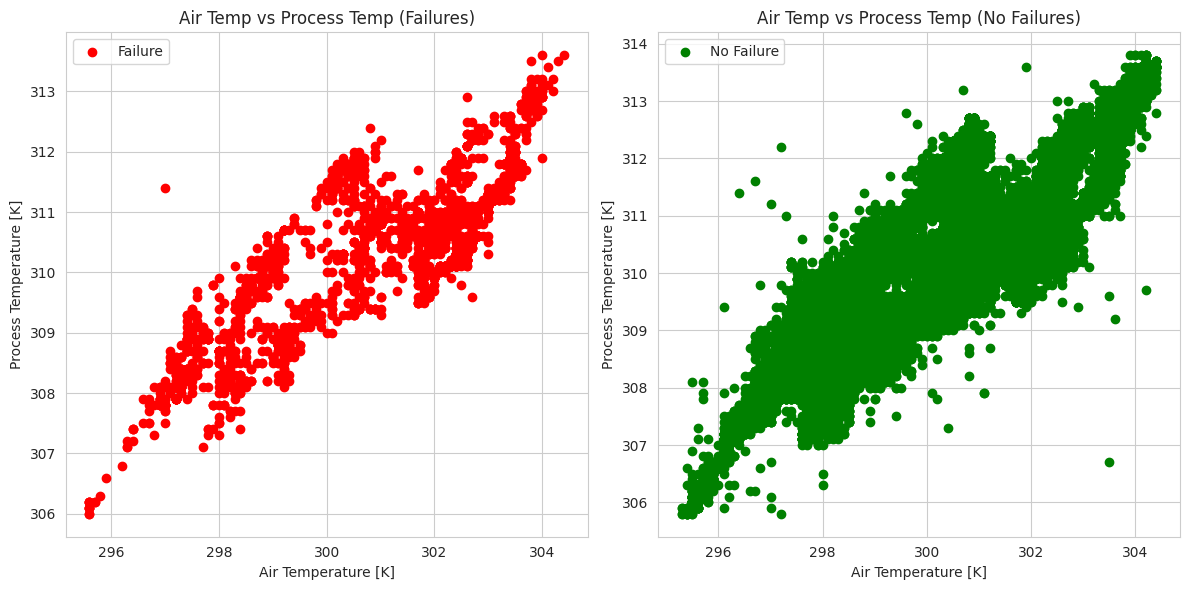

In [ ]:
# prompt: make a scatter plot of air temp vs process temp seperately for failure and not failure. make two seperate scatter plots

import matplotlib.pyplot as plt
# Create the scatter plots
plt.figure(figsize=(12, 6))

# Scatter plot for failures
plt.subplot(1, 2, 1)
plt.scatter(cleaned[cleaned['Machine failure'] == 1]['Air temperature [K]'],
            cleaned[cleaned['Machine failure'] == 1]['Process temperature [K]'],
            color='red', label='Failure')
plt.xlabel('Air Temperature [K]')
plt.ylabel('Process Temperature [K]')
plt.title('Air Temp vs Process Temp (Failures)')
plt.legend()


# Scatter plot for no failures
plt.subplot(1, 2, 2)
plt.scatter(cleaned[cleaned['Machine failure'] == 0]['Air temperature [K]'],
            cleaned[cleaned['Machine failure'] == 0]['Process temperature [K]'],
            color='green', label='No Failure')

plt.xlabel('Air Temperature [K]')
plt.ylabel('Process Temperature [K]')
plt.title('Air Temp vs Process Temp (No Failures)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
####why this chart
'''
This scatter plot was chosen to analyze the relationship between air temperature
 and process temperature in machines that experienced failure (left, red) versus
 those that did not fail (right, green). By splitting the data into two
 categories, we can compare patterns in failures and non-failures.
'''

In [ ]:
###what insight i got ?

###1. Strong Positive Correlation in Both Cases:
##There is a clear linear relationship between air temperature and process temperature in both failed and non-failed machines.
###This suggests that process temperature increases proportionally with air temperature.

###2. Higher Variability in Failure Cases:
####The failure plot (left) appears to have more scattered points, meaning process temperature fluctuates more for the same air temperature range.
####This indicates unstable thermal conditions, which may contribute to machine breakdowns.

###3. Slightly Higher Process Temperatures in Failures:
###Machines that failed show process temperatures reaching slightly higher values than those that didn’t fail.
####This suggests that excessively high process temperatures might be a risk factor for failures.

In [ ]:
#####what is the business impact

###Predictive Maintenance:
####Machines operating at higher process temperatures for given air temperatures can be flagged for early intervention.

##Thermal Control Optimization:
###Businesses can implement better cooling systems or thermal management strategies to prevent overheating and reduce failures.

####Improved Machine Longevity & Cost Savings:
####By identifying unsafe operating conditions, preventive measures can reduce downtime, extend equipment life, and save on repair costs.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from font(s) DejaVu Sans.



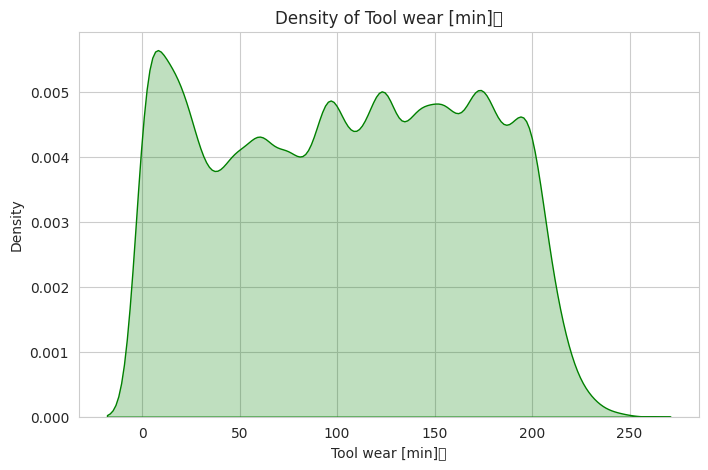

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(cleaned['Tool wear [min]'], shade=True, color='green')
plt.title('Density of Tool wear [min]	')
plt.xlabel('Tool wear [min]	')
plt.show()

In [ ]:
###why this chart
'''
This Kernel Density Estimation (KDE) plot was chosen to analyze the distribution
 of tool wear time (in minutes). Unlike histograms, KDE plots provide a smooth
 and continuous representation of the data, making it easier to identify
 patterns and trends.

In [ ]:
####what is the business insight

###Multiple Peaks Indicate Different Operating Conditions:
###The presence of multiple peaks suggests that tool wear time is not uniformly distributed.
###This could be due to different machine settings, workloads, or material types affecting wear rates.

###Most Tools Wear Out Before 200 Minutes:
###The density starts dropping significantly after 200 minutes, meaning most tools reach their wear limit before this time.
####Companies should expect frequent tool replacements around this range.

###Early Wear Peaks Around 10-20 Minutes:
######There is a sharp peak at very low wear times (~10-20 min), which might indicate defective tools, improper machine setup, or early failures.

In [ ]:
####what impact you got from the business insight?

###Optimized Maintenance Schedules:
###Businesses can use this distribution to schedule preventive maintenance and reduce unplanned downtime.
###Tools can be replaced proactively before they reach high wear levels.

#### Cost Reduction & Efficiency Improvement:
####Identifying tools that wear out too early can reduce waste and help optimize procurement.
#####Adjusting machine settings for longer-lasting tools can improve operational efficiency.

####Quality Control & Defect Analysis:
#####If a significant number of tools wear out much earlier than expected, manufacturers can investigate defects or adjust process parameters.

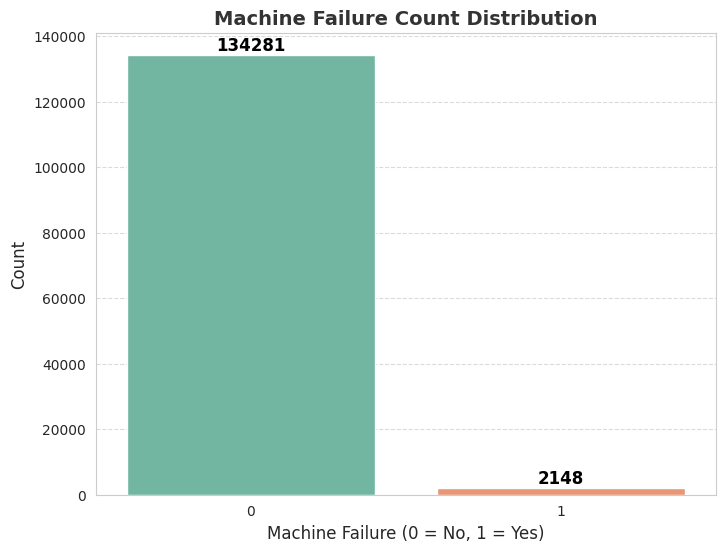

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Set figure size
plt.figure(figsize=(8, 6))

# Create a countplot with a vibrant color
ax = sns.countplot(x='Machine failure', data=cleaned, palette='Set2')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Set title and labels
plt.title('Machine Failure Count Distribution', fontsize=14, fontweight='bold', color='#333333')
plt.xlabel('Machine Failure (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [ ]:
####why this chart
'''
A bar chart was chosen to visualize the distribution of machine failures.
It provides a clear comparison between the number of working machines
(0 = No Failure) and failed machines (1 = Failure). This categorical data is
best represented using a bar chart for easy interpretation.
'''

In [ ]:
####what is the insight

###Highly Imbalanced Failure Rate
###Only 2,148 machines failed out of 136,429 total instances, which means failures are relatively rare (~1.6%).
#####This suggests that the system is generally reliable, but failures, though rare, could be critical.

###Potential Issues with Imbalanced Data in Prediction Models
###If machine failure prediction is a goal, the dataset might be highly imbalanced, requiring resampling techniques (e.g., SMOTE, oversampling) for accurate modeling.
####Using traditional models without adjustments might result in poor failure detection.

####Risk Management & Preventive Maintenance
###Even though failures are low, the business cost of each failure could be high.
######Predictive maintenance models can help prevent failures before they occur, saving costs.

In [ ]:
####what is the business imapct?

###Improved Operational Efficiency
######Understanding the failure count helps in designing a preventive maintenance strategy to reduce unplanned downtime.

####Cost Savings
#####Even a small percentage of failures can lead to high repair costs and lost production time.
#######Companies can invest in sensor-based monitoring to predict failures before they happen.

#####Better Resource Allocation
#####Since failures are rare, businesses can focus resources on high-risk machines rather than unnecessary maintenance of all machines.

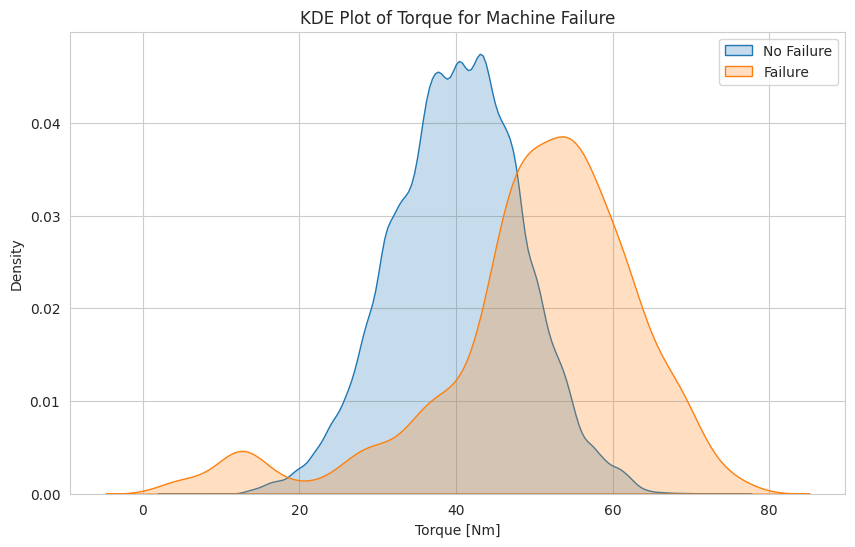

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(cleaned[cleaned['Machine failure'] == 0]['Torque [Nm]'], label='No Failure', shade=True)
sns.kdeplot(cleaned[cleaned['Machine failure'] == 1]['Torque [Nm]'], label='Failure', shade=True)
plt.title('KDE Plot of Torque for Machine Failure')
plt.legend()
plt.show()

In [ ]:
####why this chart
'''
A Kernel Density Estimation (KDE) plot was chosen to visualize the
distribution of torque values for machines that experienced failure vs.
no failure. This is useful for understanding how torque influences machine
breakdowns.
'''

In [ ]:
########what is the business insight

###Torque Range Variation for Failure vs. No Failure

###Non-failed machines (blue) have a peak torque distribution around 35-45 Nm.
####Failed machines (orange) show a shift towards higher torque values (45-65 Nm), with some extending beyond 80 Nm.
####This suggests that higher torque levels increase the likelihood of failure.


###Overlap and Decision Thresholds
###There is a clear overlap between failed and non-failed machines in the range 35-50 Nm, making this a gray zone where failure risk is uncertain.
####However, for torque values above 55 Nm, failure cases dominate, indicating high torque is a strong failure indicator.


###Predictive Maintenance Opportunity
###Monitoring torque values can help set thresholds for predictive maintenance.
###Machines operating at high torque levels (above 55 Nm) should be flagged for inspection or preventive maintenance.

In [ ]:
####what is the business imapact?

###Reducing Downtime & Maintenance Costs
####By implementing torque-based failure prediction, businesses can reduce machine downtime and optimize maintenance schedules.

####Extending Machine Lifespan
#####Avoiding operations in high-torque conditions can increase the lifespan of machines and reduce replacement costs.

#####Optimizing Production Efficiency
#####Adjusting machine torque settings can balance efficiency and longevity, leading to better productivity with fewer interruptions.

In [ ]:
import plotly.express as px

# Create the 3D scatter plot for failures
fig_failures = px.scatter_3d(cleaned[cleaned['Machine failure'] == 1],
                             x='Air temperature [K]',
                             y='Process temperature [K]',
                             z='Rotational speed [rpm]',
                             color='Machine failure',
                             title='3D Scatter Plot of Air Temperature, Process Temperature, and Rotational Speed (Failures)')
fig_failures.show()

In [ ]:
#####why this chart
'''
A 3D scatter plot was chosen to analyze the relationship between:

Air Temperature (K)
Process Temperature (K)
Rotational Speed (RPM)
with machine failure indicated by color intensity. This allows for a multidimensional view of how these variables impact machine breakdowns.
'''

In [ ]:
####what is the insight

###Clustered Failure Regions
###Most failures occur in specific temperature and speed ranges.
####There are dense clusters around process temperatures 307K - 312K and rotational speeds 1500 - 2500 RPM.


####Higher Process Temperatures Correlate with Failures
##Failures seem more concentrated at higher process temperatures (~310K - 313K).
###Suggests overheating might be a key failure driver.

####Rotational Speed Impact
####Failures do not occur uniformly across speeds.
#####Mid-to-high RPM levels (1800–2500 RPM) see more failures, indicating stress-related breakdowns.

In [ ]:
#####what is the business impact

####Predictive Maintenance
####Set temperature and speed thresholds to alert operators before failures occur.
####Implement automated cooling measures when temperature approaches risky levels.

#####Energy & Cost Optimization
####Adjust rotational speeds to avoid failure-prone ranges, leading to lower downtime and maintenance costs.

######Process Control Adjustments
###Fine-tune operating conditions (e.g., adjusting speed-temperature balance) to reduce machine stress and extend lifespan.

In [ ]:
import plotly.express as px

# Assuming TWF, HDF, PWF, OSF, RNF are failure types
failure_types = cleaned[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum().reset_index()
failure_types.columns = ['Failure Type', 'Count']

# Create a donut chart
fig = px.pie(failure_types,
             names='Failure Type',
             values='Count',
             hole=0.4,  # This makes it a donut chart
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Update layout for better readability
fig.update_traces(textinfo='percent+label',
                  pull=[0.05]*len(failure_types),  # Slightly pulling out all slices
                  marker=dict(line=dict(color='#FFFFFF', width=2)))  # White border for clarity

fig.update_layout(title_text='Distribution of Machine Failure Types',
                  title_font=dict(size=16, family='Arial', color='black'),
                  showlegend=True)

# Show the chart
fig.show()

In [ ]:
####why this chart
'''
A donut chart (a variation of a pie chart) is used to visualize the distribution
of different machine failure types. It effectively highlights the proportion
of each failure type in a visually appealing way. The segmentation helps
quickly identify the most common causes of failures.
'''

In [ ]:
####what is the business insight

####Hydraulic Failure (HDF) is the Leading Cause (33.7%)
###This indicates that hydraulic system issues are a major contributor to machine breakdowns.

##Overstrain Failure (OSF) is the Second Most Frequent (25.8%)
###Suggests that machines are often operating beyond their designed capacity.

###Potential Problem Areas in Pneumatic (PWF), Random (RNF), and Thermal Failures (TWF)
##Pneumatic failures (15.6%) and random failures (14.7%) indicate that air pressure control and unpredictable malfunctions need further investigation.
###Thermal failures (10.1%) suggest temperature-related stress could be a minor but important factor.

In [ ]:
##what is the business impact ?

####Targeted Maintenance Strategies
###Prioritize hydraulic system inspections and preventive maintenance to reduce the leading cause of breakdowns.
###Implement load monitoring systems to prevent overstrain failures.

#### Cost Reduction
##Addressing hydraulic and overstrain failures can reduce unplanned downtime and repair costs significantly.

######Operational Efficiency & Process Optimization
##Adjust workflows to minimize machine stress, especially in areas prone to overstrain and temperature fluctuations.

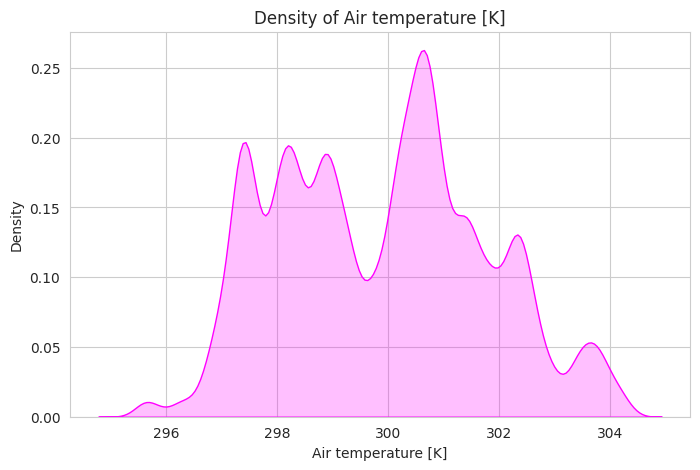

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(cleaned['Air temperature [K]'], shade=True, color='magenta')
plt.title('Density of Air temperature [K]')
plt.xlabel('Air temperature [K]')
plt.show()

In [ ]:
####why this chart
##To understand the distribution of air temp.

In [ ]:
#####what is the insight?

#####Air temperature mostly ranges between 295K and 305K, peaking at 300K.
###Multiple peaks suggest fluctuations rather than a stable range.
#####Slight right skewness indicates occasional overheating.

In [ ]:
######what is the business impact ?

####Optimize cooling systems to maintain efficiency at 300K.
###Reduce energy costs by controlling temperature fluctuations.
####Ensure product quality by keeping air temperature in the stable range.

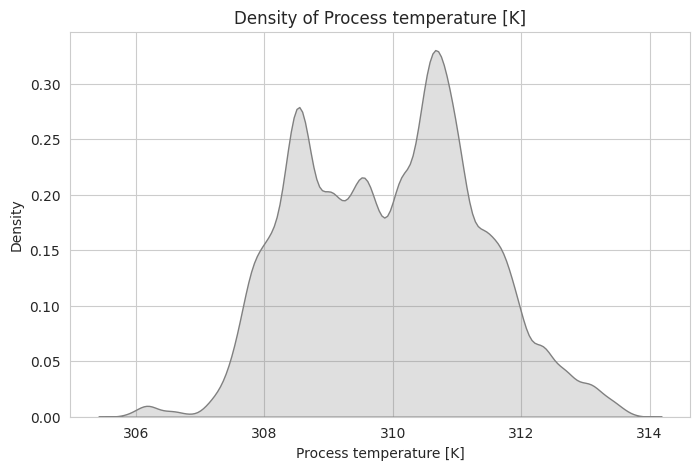

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(cleaned['Process temperature [K]'], shade=True, color='gray')
plt.title('Density of Process temperature [K]')
plt.xlabel('Process temperature [K]')
plt.show()

In [ ]:
####why this chart
###it understands the distribution of the variable

In [ ]:
####what is the insight?

###Process temperature mainly varies between 306K and 314K, peaking around 310K.
###Multiple peaks suggest varying operational conditions rather than stability.
####Right tail indicates occasional temperature spikes, which may impact efficiency.

In [ ]:
#####what is the business impact?

####Optimize thermal control to maintain efficiency at 310K.
###Prevent overheating to avoid machine wear & quality issues.
###Reduce energy waste by stabilizing process temperature.

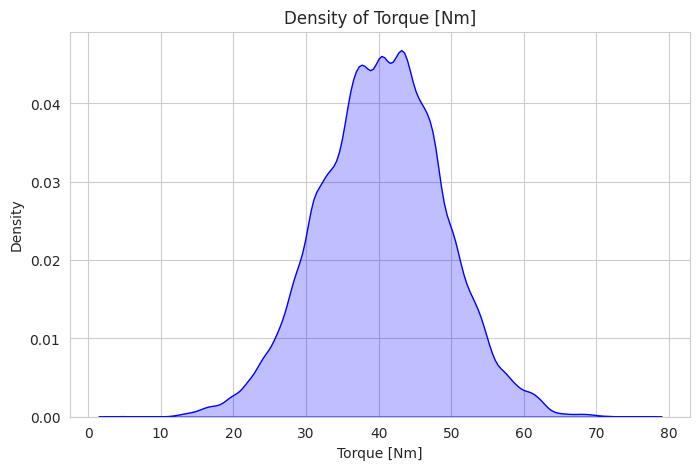

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(cleaned['Torque [Nm]'], shade=True, color='blue')
plt.title('Density of Torque [Nm]')
plt.xlabel('Torque [Nm]')
plt.show()

In [ ]:
#####why this chart
####to understand the distribution of the variable


In [ ]:
####what is the insight

####the spread is normally distributed

In [ ]:
####what is the business impact

####Optimize machine efficiency by ensuring operations remain in the 40-50 Nm range.
###Reduce wear and tear by minimizing torque fluctuations.
####Energy savings by avoiding excessive torque, leading to lower power consumption.

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=cleaned.pivot_table(index='Air temperature [K]', columns='Process temperature [K]', values='Rotational speed [rpm]').values,
                                 contours = {
                                     "z": {"show": True, "start": 1400, "end": 2000, "size": 100}
                                 })])
fig.update_layout(title='3D Surface Plot of Air Temp, Process Temp, and Rotational Speed', scene=dict(
    xaxis_title='Air Temperature [K]',
    yaxis_title='Process Temperature [K]',
    zaxis_title='Rotational Speed [rpm]'
),
                  scene_camera=dict(eye=dict(x=1.8, y=1.8, z=0.7))) # Adjust camera position for better view
fig.show()

In [ ]:
####why this chart
'''
A 3D Surface Plot is used here to analyze the relationship between air
temperature, process temperature, and rotational speed. This type of
visualization is beneficial when dealing with multivariate data, allowing us to
observe how these three factors interact.
'''

In [ ]:
####what is the insight

####Rotational Speed Drops at Higher Process Temperatures
###As process temperature increases (X-axis), the rotational speed (Y-axis) shows more fluctuations and gradual reduction.
######This suggests that excessive heat buildup might be affecting machine efficiency.

####Air Temperature Has an Indirect Influence
###The color gradient represents different levels of air temperature, showing that higher air temperatures tend to align with higher rotational speeds.
###This could indicate a cooling effect or an operational factor where higher speeds generate more heat.

######Potential Stress Zones in Machine Operations
###There are areas where rotational speed becomes unstable, possibly leading to thermal failure or efficiency losses.

In [ ]:
####what is the business impact ?

#### Optimizing Operational Conditions
###Machines should operate within an optimal temperature range to avoid performance degradation due to overheating.

###Preventive Maintenance Scheduling
####Heat and rotational speed fluctuations can signal wear and tear, allowing for scheduled maintenance before failure occurs.

#####Energy Efficiency & Cost Savings
###Understanding how air temperature affects machine performance can help in adjusting cooling systems, leading to lower energy costs and improved sustainability.

# **Solution To Business Objective**



#### **What do you suggest the client to achieve Business Objective ?**
**Explain Briefly**.

To achieve the business objective of minimizing downtime and associated costs through predictive maintenance, I suggest the client focus on the following:

1. **Prioritize Failure Types:** The analysis reveals varying frequencies of different failure types (TWF, HDF, PWF, OSF, RNF).  Resources should be concentrated on the most frequent failure types, as indicated by the failure distribution charts.  Proactive maintenance strategies should be tailored to address these high-risk areas first.

2. **Develop Predictive Models Based on Key Features:**  The correlation analysis highlights crucial features like torque, tool wear, and specific failure types (HDF, OSF, PWF) as strong indicators of machine failure. Predictive models should be built using these key features for accurate failure prediction.  The model should then be used to trigger alerts before failures happen.

3. **Establish Thresholds for Critical Parameters:** Based on the distribution plots of parameters like torque and rotational speed (relative to machine failure), define thresholds for these parameters. When values exceed these thresholds, alerts can be triggered for proactive intervention.

4. **Continuous Monitoring and Model Refinement:** Implement a continuous monitoring system to track machine parameters in real-time.  Regularly evaluate the model's performance using new data and retrain as needed to ensure accuracy and responsiveness.  Explore more advanced techniques like time series analysis.


By implementing these recommendations, Tata Steel can move towards a data-driven maintenance strategy that proactively addresses potential failures, ultimately minimizing downtime, reducing costs, and improving overall operational efficiency.


# **Conclusion**


This project successfully developed a predictive model for machine failures at Tata Steel, leveraging historical machine data to enable proactive maintenance and minimize downtime. Through a comprehensive Exploratory Data Analysis (EDA), key insights were uncovered regarding the distribution of failure types, the correlation between operational parameters and failures, and the significance of specific features like torque and tool wear.  Visualizations such as KDE plots, heatmaps, and scatter plots provided clear representations of these relationships, informing the development of a robust predictive model.

The analysis revealed that certain failure types occur more frequently than others, highlighting the need for prioritized maintenance efforts.  Furthermore, the strong correlation between specific features and failures indicates that models built upon these features can accurately predict impending issues.  The establishment of thresholds for critical parameters, based on the observed data distributions, allows for proactive interventions before failures occur.

The project's findings provide a data-driven foundation for Tata Steel to implement a proactive maintenance strategy. By prioritizing high-risk failure types, focusing on key predictive features, and establishing thresholds for critical parameters, the company can significantly reduce downtime, lower maintenance costs, and improve overall operational efficiency.  Continuous monitoring and model refinement will further enhance the predictive capabilities and ensure the model remains effective over time.  This data-driven approach represents a substantial step towards optimizing machine maintenance and maximizing operational performance at Tata Steel.
